In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [168]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [170]:
for column in df.columns:
    print(f"{column}: {sum(df[column]=='unknown')}")

age: 0
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 0
euribor3m: 0
nr.employed: 0
y: 0


In [171]:
df.shape

(41188, 21)

In [172]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [173]:
mask = np.where(df['job'] == 'unknown', True, False)
df_filtered = df[~mask]

In [174]:
df_filtered['employment_status'] = np.where(
    (df_filtered['job'] == 'student') | (df_filtered['job'] == 'unemployed') | (df_filtered['job'] == 'retired'),
    0,
    1
)

In [175]:
df_filtered['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [176]:
mask = np.where(df_filtered['marital'] == 'unknown', True, False)
df_filtered = df_filtered[~mask]

In [177]:
df_filtered['marital_status'] = np.where(
    df_filtered['job'] == 'married',
    1,
    0
)

In [178]:
df_filtered['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [179]:
mask = np.where(df_filtered['education'] == 'unknown', True, False)
df_filtered = df_filtered[~mask]

In [180]:
df_filtered.replace({'education': {'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic', 'high.school': 'basic'}}, inplace=True)
df_filtered.replace({'education': {'professional.course': 'high', 'university.degree': 'high'}}, inplace=True)

In [181]:
df_filtered[['housing', 'loan']]

,housing,loan
0,no,no
1,no,no
2,yes,no
3,no,no
4,no,yes
...,...,...
41183,yes,no
41184,no,no
41185,yes,no
41186,no,no


In [182]:
df_filtered[['housing', 'loan']][df_filtered['housing']=='unknown']

,housing,loan
81,unknown,unknown
261,unknown,unknown
385,unknown,unknown
401,unknown,unknown
470,unknown,unknown
...,...,...
40990,unknown,unknown
41014,unknown,unknown
41015,unknown,unknown
41029,unknown,unknown


In [183]:
print(df_filtered[['housing', 'loan']][df_filtered['housing']=='unknown']['housing'].unique())
print(df_filtered[['housing', 'loan']][df_filtered['housing']=='unknown']['loan'].unique())

['unknown']
['unknown']


In [184]:
mask = np.where(df_filtered['housing'] == 'unknown', True, False)
df_filtered = df_filtered[~mask]

In [185]:
df_filtered['mortgage_status'] = np.where(
    df_filtered['housing'] == 'yes',
    1,
    0
)

df_filtered['loan_status'] = np.where(
    df_filtered['loan'] == 'yes',
    1,
    0
)

In [186]:
df_filtered.replace({'month': {'mar': 'spring', 'apr': 'spring', 'may': 'spring', 
                               'jun': 'summer', 'jul': 'summer', 'aug': 'summer', 
                               'sep': 'fall', 'oct': 'fall', 'nov': 'fall', 
                               'dec': 'winter'}}, inplace=True)

In [187]:
df_filtered['month'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [188]:
for outcome in df_filtered['poutcome'].unique():
    print(f"{outcome}: {sum(df_filtered['poutcome']==outcome)}")

nonexistent: 33066
failure: 3936
success: 1243


In [189]:
df_filtered['y'] = np.where(
    df_filtered['y'] == 'yes',
    1,
    0
)

In [190]:
df_filtered.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'employment_status',
       'marital_status', 'mortgage_status', 'loan_status'],
      dtype='object')

In [191]:
selected_columns = ['age', 'employment_status', 'marital_status', 'education', 'mortgage_status', 'loan_status', 'month',
                           'campaign', 'cons.price.idx', 'euribor3m', 'y']

In [192]:
df_filtered = df_filtered[selected_columns]
df_filtered


,age,employment_status,marital_status,education,mortgage_status,loan_status,month,campaign,cons.price.idx,euribor3m,y
0,56,1,0,basic,0,0,spring,1,93.994,4.857,0
1,57,1,0,basic,0,0,spring,1,93.994,4.857,0
2,37,1,0,basic,1,0,spring,1,93.994,4.857,0
3,40,1,0,basic,0,0,spring,1,93.994,4.857,0
4,56,1,0,basic,0,1,spring,1,93.994,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,0,high,1,0,fall,1,94.767,1.028,1
41184,46,1,0,high,0,0,fall,1,94.767,1.028,0
41185,56,0,0,high,1,0,fall,2,94.767,1.028,0
41186,44,1,0,high,0,0,fall,1,94.767,1.028,1


In [193]:
education = pd.get_dummies(df_filtered.education)
season = pd.get_dummies(df_filtered.month)

In [194]:
df_filtered = pd.concat([df_filtered, education, season], axis=1)
df_filtered.drop(['education', 'month'], axis = 1, inplace = True)
df_filtered.head()

,age,employment_status,marital_status,mortgage_status,loan_status,campaign,cons.price.idx,euribor3m,y,basic,high,illiterate,fall,spring,summer,winter
0,56,1,0,0,0,1,93.994,4.857,0,True,False,False,False,True,False,False
1,57,1,0,0,0,1,93.994,4.857,0,True,False,False,False,True,False,False
2,37,1,0,1,0,1,93.994,4.857,0,True,False,False,False,True,False,False
3,40,1,0,0,0,1,93.994,4.857,0,True,False,False,False,True,False,False
4,56,1,0,0,1,1,93.994,4.857,0,True,False,False,False,True,False,False


# Code

In [196]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF, FastICA
from mpl_toolkits.mplot3d import Axes3D

class Decomp:
    def __init__(self, n_components, method="pca", scaler_method='standard'):
        self.n_components = n_components
        self.method = method
        self.scaler_method = scaler_method
        self.mixing_ = None
        
    def dimension_reduction(self, df):
        X_reduced = self.dimension_method(df)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def dimension_method(self, df):
        X = self.scaler(df)
        if self.method == "pca":
            pca = PCA(n_components=self.n_components, random_state=0)
            X_reduced = pca.fit_transform(X)
            self.comp = pca
        elif self.method == "nmf":
            nmf = NMF(n_components=self.n_components, random_state=0)
            X_reduced = nmf.fit_transform(X)
        elif self.method == "ica":
            comp = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
            X_reduced = comp.fit_transform(X)
            self.mixing_ = comp.mixing_  # Store the mixing_ matrix
        else:
            raise ValueError(f"Invalid method name: {method}")
        
        
        return X_reduced
    
    def get_mixing_matrix(self):
        if self.method == "ica":
            return self.mixing_
        else:
            raise ValueError("Mixing matrix is only available for ICA dimensionality reduction method.")
    
    
    def scaler(self, df):
        _df = df.copy()
        if self.scaler_method == "standard":
            return StandardScaler().fit_transform(_df)
        elif self.scaler_method == "minmax":
            return MinMaxScaler().fit_transform(_df)
        elif self.scaler_method == None:
            return _df.values
        else:
            raise ValueError(f"Invalid scaler_method name")
        
    def get_columns(self):
        return [f'{self.method.upper()}_{_}' for _ in range(self.n_components)]
    
    def get_explained_variance_ratio(self):
        return np.sum(self.comp.explained_variance_ratio_)
    
    def transform(self, df):
        X = self.scaler(df)
        X_reduced = self.comp.transform(X)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def decomp_plot(self, tmp, label, hue='genre'):
        if self.n_components == 2:
            # Gráfico 2D
            plt.figure(figsize=(16, 9))
            sns.scatterplot(x=f"{label}_0", y=f"{label}_1", data=tmp, hue=hue, alpha=0.7, s=100, palette='coolwarm');
            plt.title(f'{label} on {hue}', fontsize=20)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=10)
            plt.xlabel(f"{label} Component 1", fontsize=15)
            plt.ylabel(f"{label} Component 2", fontsize=15)
        elif self.n_components == 3:
            # Gráfico 3D
            fig = plt.figure(figsize=(16, 9))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(tmp[f"{label}_0"], tmp[f"{label}_1"], tmp[f"{label}_2"], c=tmp[hue], cmap='coolwarm', s=100)
            ax.set_xlabel(f"{label} Component 1", fontsize=15)
            ax.set_ylabel(f"{label} Component 2", fontsize=15)
            ax.set_zlabel(f"{label} Component 3", fontsize=15)
            plt.title(f'{label} on {hue} (3D)', fontsize=20)
            fig.colorbar(scatter)
        plt.show()

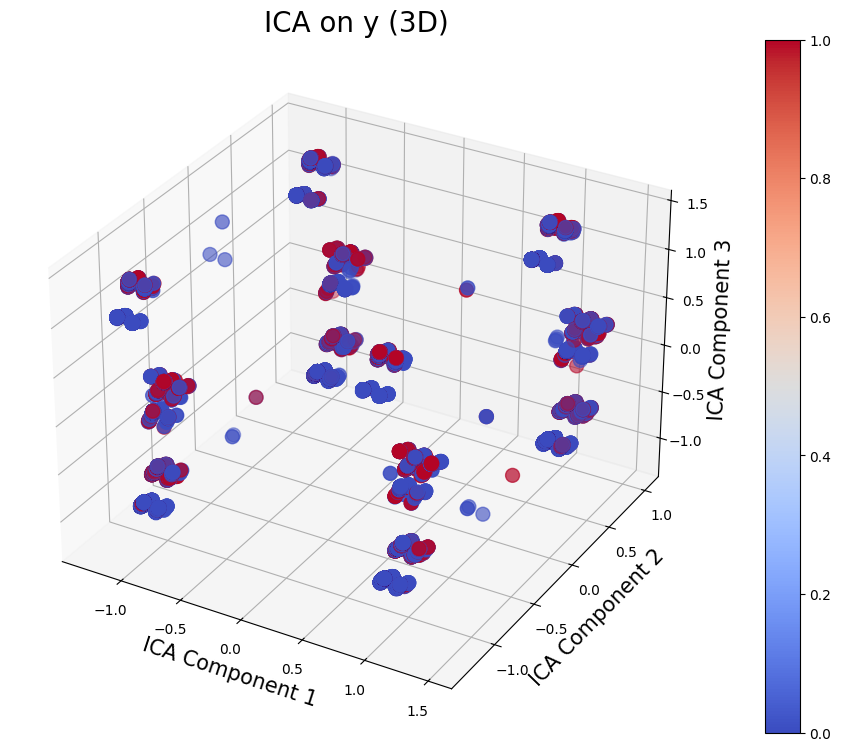

In [210]:
data = df_filtered.copy()
method = 'ica'

decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data.drop('y', axis=1))
decomp_feature = pd.concat([decomp_feature, data['y']], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'y')

del data

In [209]:
decomp_feature

,ICA_0,ICA_1,ICA_2,y
0,-1.231906,0.911093,0.790665,0
1,-1.231815,0.911273,0.790549,0
2,0.730519,0.946426,0.743383,0
3,-1.233366,0.908212,0.792513,0
4,-1.101140,0.906441,0.784094,0
...,...,...,...,...
41183,1.159398,-1.191074,0.343673,1
41184,-0.847691,-1.268719,0.388873,0
41185,1.157705,-1.194070,0.345213,0
41186,-0.847874,-1.269079,0.389104,1


In [211]:
from sklearn.decomposition import PCA

In [212]:
pca = PCA(0.95)

In [217]:
df_filtered_pca = pca.fit_transform(df_filtered.drop('y', axis=1))

In [220]:
df_filtered_pca

array([[ 1.61375363e+01, -1.40380012e+00],
       [ 1.71375032e+01, -1.40558385e+00],
       [-2.86182018e+00, -1.37300612e+00],
       ...,
       [ 1.61397800e+01, -9.34670271e-01],
       [ 4.13244353e+00, -1.89519898e+00],
       [ 3.41407912e+01,  2.12632173e-02]])

In [218]:
pca.explained_variance_ratio_

array([0.89412192, 0.06561113])

In [219]:
pca.n_components_

2

In [221]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_filtered_pca, df_filtered['y'], test_size=0.2, random_state=30)

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.8837756569486207

In [229]:
y_predictions = model.predict(X_test_pca)

In [235]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Confusion Matrix:
[[6760    0]
 [ 889    0]]

Accuracy: 0.8837756569486207


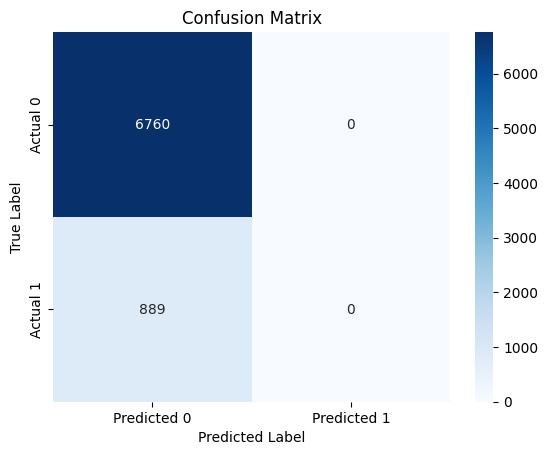

In [236]:
conf_matrix = confusion_matrix(y_test, y_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predictions)
print(f"\nAccuracy: {accuracy}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [19]:
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,False,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,False,False,False,False,False,True,False,False,False,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,False,False,False,False,False,True,False,False,False,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,False,False,False,True,False,False,False,False,False,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,False,False,False,False,False,True,False,False,False,False


In [20]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,56,no,no,no,261,1,999,0,1.1,93.994,...,False,False,False,False,False,False,False,False,False,False
1,57,unknown,no,no,149,1,999,0,1.1,93.994,...,False,False,False,False,False,True,False,False,False,False
2,37,no,yes,no,226,1,999,0,1.1,93.994,...,False,False,False,False,False,True,False,False,False,False
3,40,no,no,no,151,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,False,False,False
4,56,no,no,yes,307,1,999,0,1.1,93.994,...,False,False,False,False,False,True,False,False,False,False


In [21]:
df.columns, len(df.columns)

(Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
        'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
        'euribor3m', 'nr.employed', 'y', 'telephone', 'nonexistent', 'success',
        'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
        'self-employed', 'services', 'student', 'technician', 'unemployed',
        'unknown', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep', 'married', 'single', 'unknown', 'mon', 'thu', 'tue', 'wed',
        'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype='object'),
 51)

In [241]:
X_train_pca

array([[18.14658304, -1.35246073],
       [13.14067469, -1.35876462],
       [11.13586078,  0.57874557],
       ...,
       [11.14093075,  0.57795981],
       [18.12759815, -1.97012696],
       [-4.86521947, -0.38104193]])

In [245]:
train_ica = pd.DataFrame(X_train_pca).join(y_train)
train_ica.dropna(inplace=True)
train_ica

,0,1,y
0,18.146583,-1.352461,0.0
1,13.140675,-1.358765,0.0
2,11.135861,0.578746,0.0
3,-3.864782,-0.912495,0.0
4,-11.865929,-1.880866,0.0
...,...,...,...
30588,-3.866864,-1.371153,0.0
30589,4.138269,-1.677274,1.0
30591,-0.864591,-1.892221,1.0
30592,-6.852481,3.016746,0.0


In [247]:
test_ica = pd.DataFrame(X_test_pca).join(y_test)
test_ica.dropna(inplace=True)
test_ica

,0,1,y
16,-5.869904,-0.929391,0.0
22,-7.865728,0.050643,0.0
34,9.140554,1.612419,0.0
37,-6.855588,-1.365784,0.0
47,12.148413,-0.369140,0.0
...,...,...,...
7618,-9.847829,8.585014,0.0
7627,-9.863638,-1.317526,0.0
7629,3.140938,-1.300022,0.0
7642,-9.861851,1.606912,0.0


In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [258]:
def train_and_evaluate_models_train_test(train_df, test_df, target_col, df_name):
    # Separate features and the target column for training and test sets
    X_train = train_df.drop(target_col, axis=1).values
    y_train = train_df[target_col].values
    X_test = test_df.drop(target_col, axis=1).values
    y_test = test_df[target_col].values
    
    # Initialize a list to store the trained models and their accuracies
    trained_models = []

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")
    trained_models.append(("Random Forest", random_forest_model, random_forest_accuracy))

    # C5 (Decision Tree)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")
    trained_models.append(("C5", c5_model, c5_accuracy))

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")
    trained_models.append(("HistGradientBoostingClassifier", hist_gradient_boosting_model, hist_gradient_boosting_accuracy))

    # KNN (K-Nearest Neighbors)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    print(f"{df_name} - KNN Accuracy: {knn_accuracy:.2f}")
    trained_models.append(("KNN", knn_model, knn_accuracy))

    return trained_models

In [259]:
trained_models = train_and_evaluate_models_train_test(train_ica, test_ica, 'y', "Train data vs Test data")

Train data vs Test data - Random Forest Accuracy: 0.94
Train data vs Test data - C5 Accuracy: 0.91
Train data vs Test data - HistGradientBoostingClassifier Accuracy: 0.96
Train data vs Test data - KNN Accuracy: 0.96


In [263]:
trained_models[2][1].predict(X_test_pca)

array([0., 0., 0., ..., 0., 0., 0.])

In [269]:
hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
hist_gradient_boosting_model.fit(X_train_pca, y_train)
hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test_pca)
hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
print(f"HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")


HistGradientBoostingClassifier Accuracy: 0.88


Confusion Matrix:
[[6760    0]
 [ 889    0]]

Accuracy: 0.8837756569486207


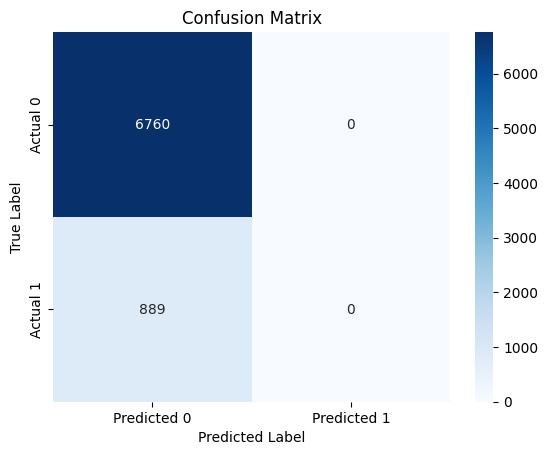

In [264]:
conf_matrix = confusion_matrix(y_test, trained_models[2][1].predict(X_test_pca))

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, trained_models[2][1].predict(X_test_pca))
print(f"\nAccuracy: {accuracy}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()